# Acid Rain Example Code

In [2]:
!pip install aguaclara

In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt

Let's plot the alphas for the carbonate system to show the relative importance of the three species!

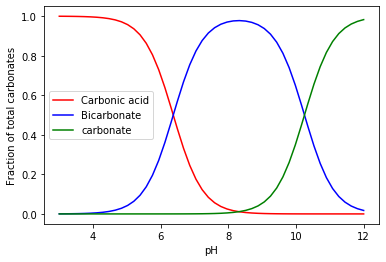

In [4]:
# Create a uniform spaced array from 3 to 12
pH_graph = np.linspace(3,12,50)
fig, ax = plt.subplots()
ax.plot(pH_graph, ac.alpha0_carbonate(pH_graph),'r', pH_graph, ac.alpha1_carbonate(pH_graph),'b',pH_graph, ac.alpha2_carbonate(pH_graph),'g')
plt.xlabel('pH')
plt.ylabel('Fraction of total carbonates')
plt.legend(['Carbonic acid', 'Bicarbonate', 'carbonate'])
plt.show()

The alpha terms representing the carbonate species are shown in Figure 1.

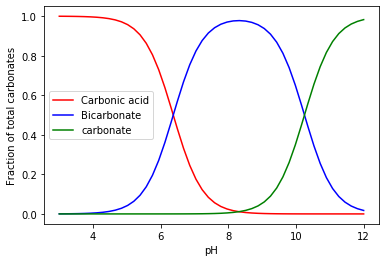

Figure 1. Carbonate species relative importance as a function of pH.

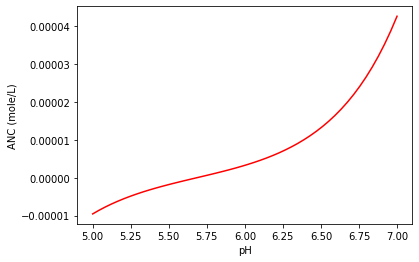

In [6]:
pH_graph = np.linspace(5,7,50)
fig, ax = plt.subplots()
ax.plot(pH_graph, ac.ANC_open(pH_graph),'r')
plt.xlabel('pH')
plt.ylabel('ANC (mole/L)')
#plt.yscale('log')
plt.show()

Figure 2. ANC as a function of pH in a system in equilibrium with the atmosphere.

In [7]:
from scipy import optimize
def ANC_zeroed(pHguess, ANC):
  return ((ac.ANC_open(pHguess) - ANC).to(u.mol/u.L)).magnitude

# Now we use root finding to find the pH that results in the known ANC.
# Our function will call the ANC_zeroed function. The pHguess is the first
# input of the ANC_zeroed function and the range on that is set by the next
# two inputs in the optimize.brentq function. The ANC is passed as an
# additional argument.

def pH_open(ANC):
  return optimize.brentq(ANC_zeroed, 0, 14,args=(ANC))

# We can test this function to find the pH of pure water in equilibrium
# with the atmosphere
print('The pH of pure water equilibrium with the atmosphere is',ac.round_sig_figs(pH_open(0),3))

The pH of pure water equilibrium with the atmosphere is 5.68


Now let's plot some data

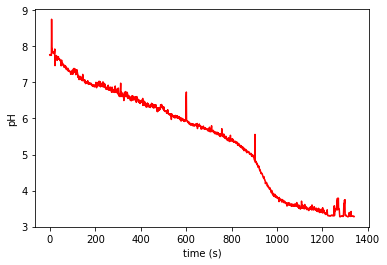

In [8]:
#push the data file to your github and then get the url of the raw file.
data_file_path='https://raw.githubusercontent.com/monroews/CEE4530/master/Examples/data/Acid_Rain.xls'
# Use the ac.notes function to find what you've commented in the data file.
lakepHnotes = ac.notes(data_file_path)
lakepHnotes
# set the start index of the data file to one past the note indicating the start.
#The following code finds the index of the last note in the data file.
start=ac.notes(data_file_path).last_valid_index() + 1
start
#The pH data is in column 1
column=1
lakepH=ac.column_of_data(data_file_path,start,column)
#extract the corresponding time data and convert to seconds
time = ac.column_of_time(data_file_path,start).to(u.s)
#Now plot the graph
fig, ax = plt.subplots()
ax.plot(time,lakepH,'r')
plt.xlabel('time (s)')
plt.ylabel('pH')
plt.show()

Figure 3 shows the pH as a function of time in the CMFR lake with acid input.